In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(rc = {'figure.figsize':(12,7)})

In [31]:
df = pd.read_csv('./data/monday.csv', delimiter = ';')

In [32]:
df.head()

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices


In [33]:
x = df.groupby('location')[['customer_no']].count()

In [34]:
x

,customer_no
location,
checkout,1437
dairy,895
drinks,797
fruit,1005
spices,750


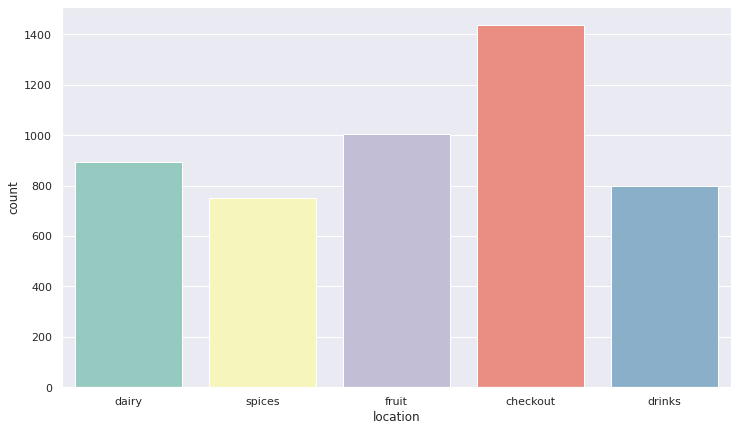

In [37]:
sns.countplot(x = 'location', data =df, palette = 'Set3')

In [45]:
df['timestamp']=pd.to_datetime(df['timestamp'])
df['timestamp']

0      2019-09-02 07:03:00
1      2019-09-02 07:03:00
2      2019-09-02 07:04:00
3      2019-09-02 07:04:00
4      2019-09-02 07:04:00
               ...        
4879   2019-09-02 21:49:00
4880   2019-09-02 21:49:00
4881   2019-09-02 21:49:00
4882   2019-09-02 21:50:00
4883   2019-09-02 21:50:00
Name: timestamp, Length: 4884, dtype: datetime64[ns]

In [155]:
y = df.groupby(['location',pd.Grouper(key = 'timestamp',freq='1H')])

In [156]:
y_new = y.count().unstack(level = 0)

In [157]:
y_new.columns 

MultiIndex([('customer_no', 'checkout'),
            ('customer_no',    'dairy'),
            ('customer_no',   'drinks'),
            ('customer_no',    'fruit'),
            ('customer_no',   'spices')],
           names=[None, 'location'])

In [158]:
y_new.columns = y_new.columns.droplevel(0)
y_new = y_new.reset_index()

y_new.columns

Index(['timestamp', 'checkout', 'dairy', 'drinks', 'fruit', 'spices'], dtype='object', name='location')

In [159]:
y_new

location,timestamp,checkout,dairy,drinks,fruit,spices
0,2019-09-02 07:00:00,92,59,60,54,52
1,2019-09-02 08:00:00,112,68,65,68,51
2,2019-09-02 09:00:00,85,50,57,76,40
3,2019-09-02 10:00:00,90,58,35,47,52
4,2019-09-02 11:00:00,55,36,24,41,33
5,2019-09-02 12:00:00,73,55,37,54,46
6,2019-09-02 13:00:00,120,76,50,95,71
7,2019-09-02 14:00:00,90,58,43,64,50
8,2019-09-02 15:00:00,94,67,48,79,54
9,2019-09-02 16:00:00,86,49,54,66,52


### Display the number of customers at checkout over time

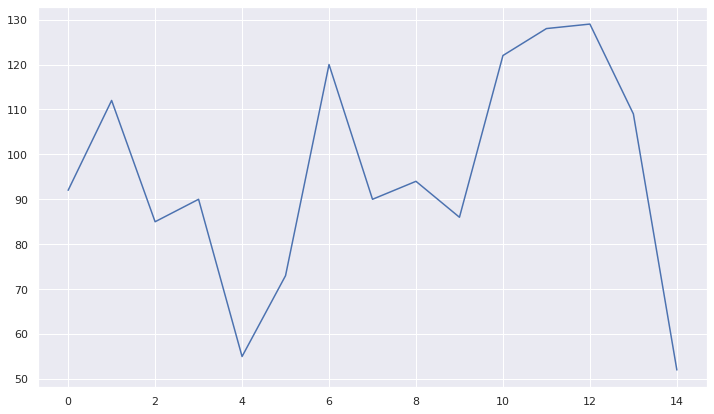

In [164]:
y_new['checkout'].plot()

### Calculate the time each customer spent in the market

In [87]:
difference=df.groupby('customer_no')[['timestamp']].agg(lambda x: x.max() - x.min())


In [88]:
difference

,timestamp
customer_no,
1,00:02:00
2,00:03:00
3,00:02:00
4,00:04:00
5,00:01:00
...,...
1443,00:01:00
1444,00:01:00
1445,00:00:00


### Calculate the total number of customers in the supermarket over time.